In [1]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
from sklearn import linear_model
from sklearn.datasets import load_iris



## Dataset description and import

In [3]:
iris = load_iris()

In [5]:
X = iris.data

Y = iris.target

In [7]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

## Data preparation and Visualization

In [8]:
# Grab data
iris_data = DataFrame(X,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])

# Grab Target
iris_target = DataFrame(Y,columns=['Species'])

In [9]:
iris_target

,Species
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [11]:
def flower(num):
    if(num==0):
        return "setosa"
    elif(num==1):
        return "versicolor"
    else:
        return "virginica"

In [14]:
iris_target['Species']=iris_target['Species'].apply(flower)

In [20]:
iris = iris_data.join(iris_target)

In [21]:
iris

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


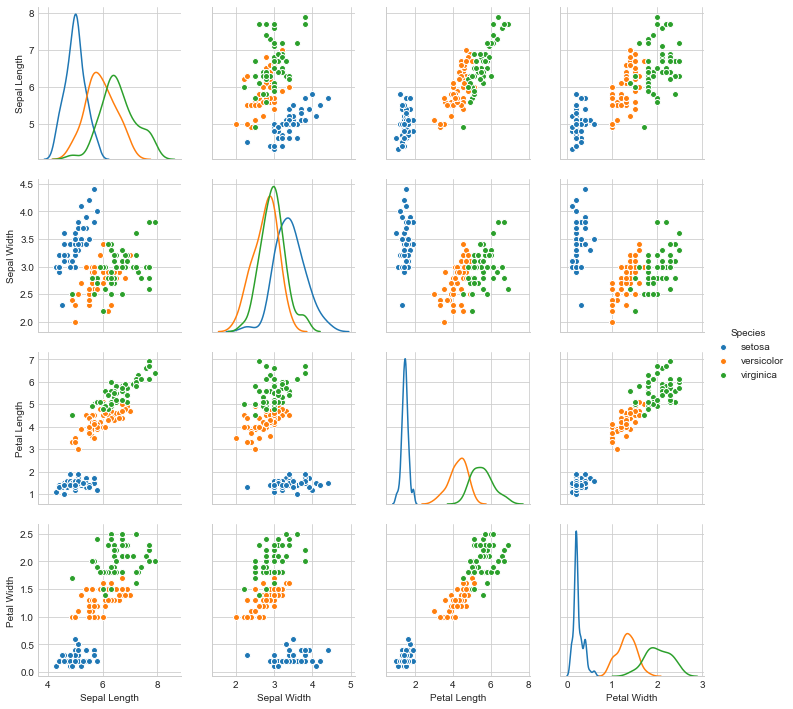

In [23]:
sns.pairplot(iris,hue='Species',diag_kind='kde')

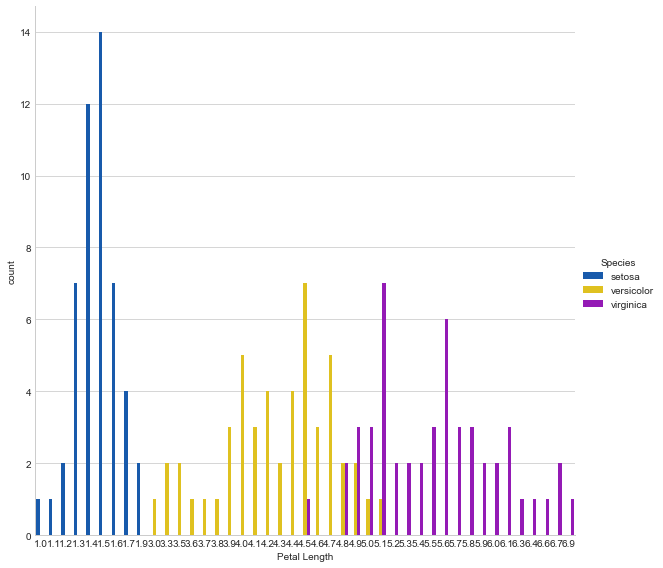

In [29]:
sns.factorplot('Petal Length',data=iris,hue='Species',size=8,kind='count',palette='prism')

## Multi-Class Classification using Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [37]:
logreg = LogisticRegression()
X_train, X_test, Y_train, Y_test = train_test_split(iris_data, np.ravel(iris_target), test_size=0.4,random_state=3)
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
pred = logreg.predict(X_test)

In [41]:
from sklearn import metrics

In [42]:
metrics.accuracy_score(Y_test,pred)

0.93333333333333335

## Multi-Class Classification using K Nearst Neighbor algorithm

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier(n_neighbors=4)

In [45]:
knn.fit(X_train,Y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [49]:
knn_pred = knn.predict(X_test)

In [50]:
metrics.accuracy_score(Y_test,knn_pred)

0.94999999999999996

### k-value versus accuracy of prediction

In [67]:
k_range = np.arange(1,51)

In [68]:
accuracy = []

In [69]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test,pred))

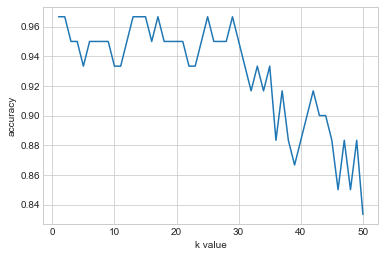

In [70]:
plt.plot(k_range,accuracy)
plt.xlabel('k value')
plt.ylabel('accuracy')